In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD

Using TensorFlow backend.


In [3]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("titanic_train.csv")
dataset=pd.read_csv("titanic_train.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

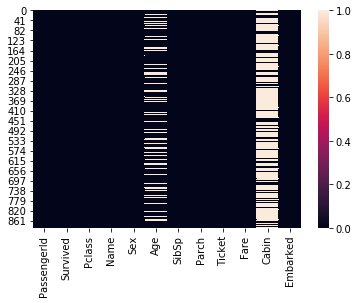

In [8]:
sns.heatmap(data.isnull())

In [9]:
data.shape

(891, 12)

In [10]:
data[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived")

,Sex,Survived
1,male,0.188908
0,female,0.742038


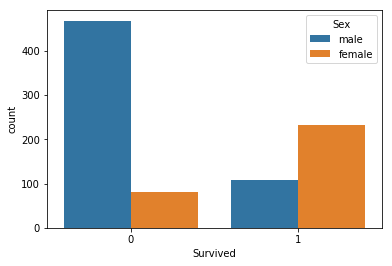

In [11]:
sns.countplot(x="Survived",data=data,hue="Sex")

In [12]:
data[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived")

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


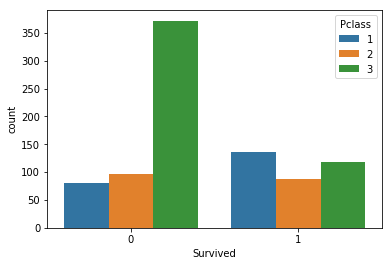

In [13]:
sns.countplot(x="Survived",data=data,hue="Pclass")

In [14]:
data[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived")

,Embarked,Survived
2,S,0.336957
1,Q,0.389610
0,C,0.553571


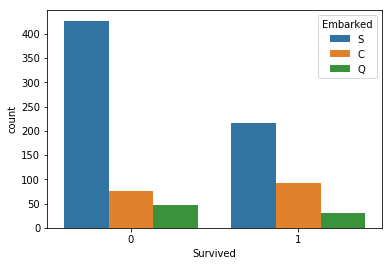

In [15]:
sns.countplot(x="Survived",data=data,hue="Embarked")

In [16]:
data.drop("Cabin",axis=1,inplace=True)

In [17]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

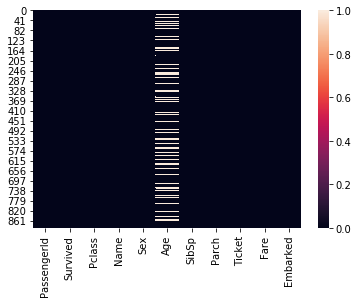

In [18]:
sns.heatmap(data.isnull())

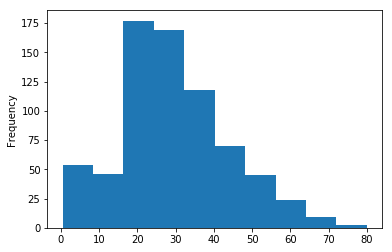

In [19]:
data["Age"].plot.hist()

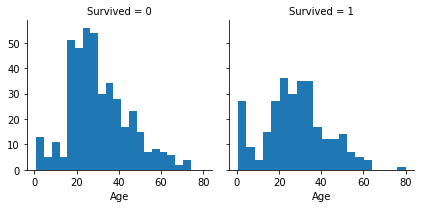

In [20]:
g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,"Age",bins=20)

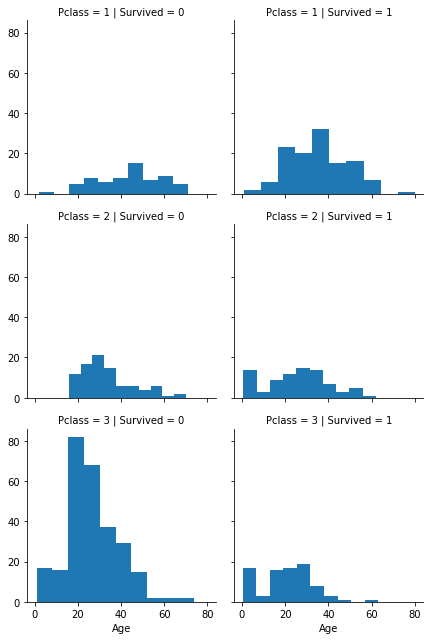

In [21]:
grid=sns.FacetGrid(data,col="Survived",row="Pclass")
grid.map(plt.hist,"Age")
grid.add_legend()

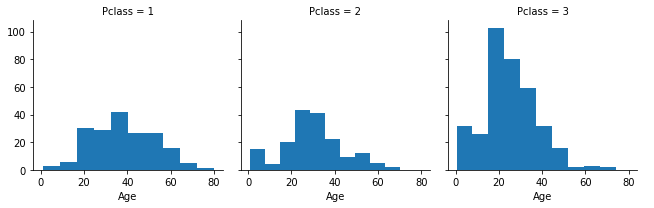

In [22]:
grid=sns.FacetGrid(data,col="Pclass")
grid.map(plt.hist,"Age")
grid.add_legend()

/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


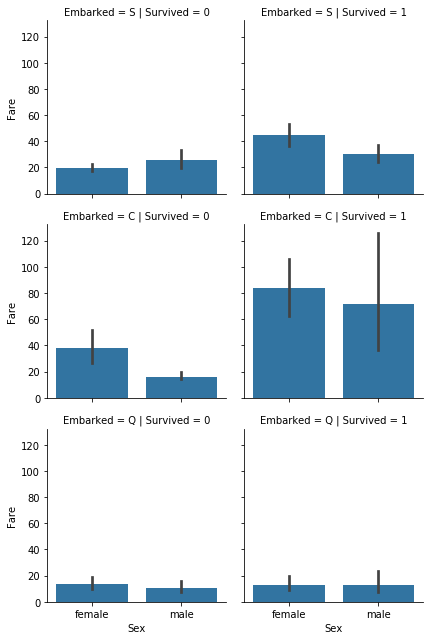

In [23]:
grid=sns.FacetGrid(data,col="Survived",row="Embarked")
grid.map(sns.barplot,"Sex","Fare")
grid.add_legend()

In [24]:
data.Age.fillna(data.groupby(['Sex','Pclass']).transform('median').Age, inplace=True)

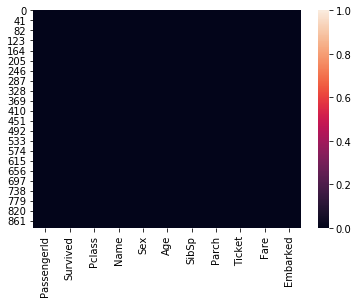

In [25]:
sns.heatmap(data.isnull())

In [26]:
data[['Embarked']] = data[['Embarked']].fillna(value=data['Embarked'].value_counts().idxmax())

In [27]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
sex=pd.get_dummies(data["Sex"],drop_first=True)
emb=pd.get_dummies(data["Embarked"],drop_first=True)
pcl=pd.get_dummies(data["Pclass"],drop_first=True)

In [30]:
data=pd.concat([data,sex,emb,pcl],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [31]:
data.columns

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',    'Embarked',        'male',
                 'Q',           'S',             2,             3],
      dtype='object')

In [32]:
data.drop(["PassengerId","Name","Sex","Embarked","Pclass","Fare","Ticket"],axis=1,inplace=True)
data.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [33]:
data.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S', 2, 3], dtype='object')

In [34]:
X=data.drop("Survived",axis=1)
y=data["Survived"]

In [35]:
print("Shape of X : ",X.shape)
print("Shape of y :",y.shape)

Shape of X :  (891, 8)
Shape of y : (891,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
model=LogisticRegression()

In [38]:
model.fit(X_train,y_train)

/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
y_pred=model.predict(X_test)

In [40]:
confusion_matrix(y_test,y_pred)

array([[155,  20],
       [ 36,  84]])

In [41]:
k=(155+84)/len(y_pred)
print("Accuracy is :",k*100)

Accuracy is : 81.01694915254237


In [42]:
model_new=Sequential()

In [43]:
model_new.add(Dense(units=1 , input_shape=(8,),activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [44]:
model_new.compile(optimizer=SGD(), loss="binary_crossentropy",metrics=["accuracy"])

In [45]:
model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_new.fit(X_train,y_train,epochs=30,verbose=0)

Instructions for updating:
Use tf.cast instead.


In [47]:
y_pred2=model_new.predict(X_test)

In [48]:
final_pred=y_pred2>0.60

In [49]:
confusion_matrix(y_test,final_pred)

array([[175,   0],
       [115,   5]])

In [50]:
len(final_pred)

295

In [51]:
k=(175)/295
print("Accuracy is :",k*100)

Accuracy is : 70.50847457627118
